In [1]:
from glob import glob
import pandas as pd

## 개별 파일 병합

In [2]:
df_total=pd.DataFrame()
df_추정매출=pd.DataFrame()
df_상주인구=pd.DataFrame()
df_생활인구=pd.DataFrame()
df_소득소비=pd.DataFrame()
df_아파트=pd.DataFrame()
df_영역=pd.DataFrame()
df_점포=pd.DataFrame()
df_직장인구=pd.DataFrame()
df_집객시설=pd.DataFrame()

In [3]:
path='../../data/raw data/행정동/'

#### 추정매출

In [4]:
## 2023년 추출 코드 필요하면 쓰세요
data = pd.read_csv("../../data/raw data/행정동/추정매출/서울시 상권분석서비스(추정매출-행정동).csv", encoding="cp949")
data_dropped = data[data['기준_년분기_코드'] >= 20231]
data_dropped.to_csv('../../data/raw data/행정동/추정매출/서울시_상권분석서비스(추정매출-행정동)_2023년.csv', index=False, encoding="cp949")

In [5]:
dfs_추정매출=[]
for f_name in glob(path+'추정매출/서울시_상권분석서비스(추정매출-행정동)_*.csv'):
    print(f_name)
    temp=pd.read_csv(f_name,encoding='cp949')
    dfs_추정매출.append(temp)
a,b,c,d,e =dfs_추정매출

../../data/raw data/행정동/추정매출\서울시_상권분석서비스(추정매출-행정동)_2019년.csv
../../data/raw data/행정동/추정매출\서울시_상권분석서비스(추정매출-행정동)_2020년.csv
../../data/raw data/행정동/추정매출\서울시_상권분석서비스(추정매출-행정동)_2021년.csv
../../data/raw data/행정동/추정매출\서울시_상권분석서비스(추정매출-행정동)_2022년.csv
../../data/raw data/행정동/추정매출\서울시_상권분석서비스(추정매출-행정동)_2023년.csv


In [6]:
df_추정매출=pd.concat([a,b,c,d,e])
df_추정매출 = df_추정매출.reset_index(drop=True)
df_추정매출.shape

(301156, 53)

In [7]:
df_추정매출['기준_년분기_코드'].unique()

array([20191, 20192, 20193, 20194, 20201, 20202, 20203, 20204, 20211,
       20212, 20213, 20214, 20221, 20222, 20223, 20224, 20231, 20232],
      dtype=int64)

In [8]:
df_추정매출.isna().sum().sum()

0

#### 상주인구

In [9]:
dfs_상주인구=[]
for f_name in glob(path+'상주인구/*.csv'):
    temp=pd.read_csv(f_name,encoding='cp949')
    dfs_상주인구.append(temp)
df_상주인구,=dfs_상주인구
df_상주인구.shape

(7629, 27)

In [10]:
df_상주인구.isna().sum()

기준_년분기_코드             0
행정동_코드                0
행정동_코드_명              0
총_상주인구_수              0
남성_상주인구_수             0
여성_상주인구_수             0
연령대_10_상주인구_수         0
연령대_20_상주인구_수         0
연령대_30_상주인구_수         0
연령대_40_상주인구_수         0
연령대_50_상주인구_수         0
연령대_60_이상_상주인구_수      0
남성연령대_10_상주인구_수       0
남성연령대_20_상주인구_수       0
남성연령대_30_상주인구_수       0
남성연령대_40_상주인구_수       0
남성연령대_50_상주인구_수       0
남성연령대_60_이상_상주인구_수    0
여성연령대_10_상주인구_수       0
여성연령대_20_상주인구_수       0
여성연령대_30_상주인구_수       0
여성연령대_40_상주인구_수       0
여성연령대_50_상주인구_수       0
여성연령대_60_이상_상주인구_수    0
총_가구_수                0
아파트_가구_수              0
비_아파트_가구_수            0
dtype: int64

In [11]:
df_상주인구['기준_년분기_코드'].unique()

array([20191, 20192, 20193, 20194, 20201, 20202, 20203, 20204, 20211,
       20212, 20213, 20214, 20221, 20222, 20224, 20231, 20232, 20223],
      dtype=int64)

In [12]:
temp_total=0
cnt=0
for x in df_상주인구['기준_년분기_코드'].unique():
    print("년분기:",x,end='  ')
    print("행정동 개수:",end='')
    print(df_상주인구.loc[df_상주인구['기준_년분기_코드']==x]['행정동_코드'].count(),end='  ')
    if cnt%3==0:
        print()
    cnt+=1
print("cnt:",cnt)

년분기: 20191  행정동 개수:418  
년분기: 20192  행정동 개수:418  년분기: 20193  행정동 개수:418  년분기: 20194  행정동 개수:425  
년분기: 20201  행정동 개수:425  년분기: 20202  행정동 개수:425  년분기: 20203  행정동 개수:425  
년분기: 20204  행정동 개수:425  년분기: 20211  행정동 개수:425  년분기: 20212  행정동 개수:425  
년분기: 20213  행정동 개수:425  년분기: 20214  행정동 개수:425  년분기: 20221  행정동 개수:425  
년분기: 20222  행정동 개수:425  년분기: 20224  행정동 개수:425  년분기: 20231  행정동 개수:425  
년분기: 20232  행정동 개수:425  년분기: 20223  행정동 개수:425  cnt: 18


In [13]:
# 20191, 20192, 20193 
dong_code_20191=list(df_상주인구.loc[df_상주인구['기준_년분기_코드']==20191]['행정동_코드'])
dong_code_20192=list(df_상주인구.loc[df_상주인구['기준_년분기_코드']==20192]['행정동_코드'])
dong_code_20193=list(df_상주인구.loc[df_상주인구['기준_년분기_코드']==20193]['행정동_코드'])
dong_code_20194=list(df_상주인구.loc[df_상주인구['기준_년분기_코드']==20194]['행정동_코드'])

In [14]:
total_dong_code_425=dong_code_20194.copy()
diff_191=[x for x in total_dong_code_425 if x not in dong_code_20191 ]
diff_192=[x for x in total_dong_code_425 if x not in dong_code_20192 ]
diff_193=[x for x in total_dong_code_425 if x not in dong_code_20193 ]
print("빠진 행정동 코드")
print(diff_191)
print(diff_192)
print(diff_193)
# 번1,2,3동/ 수유1,2,3동/ 항동

빠진 행정동 코드
[11305595, 11305603, 11305608, 11305615, 11305625, 11305635, 11530800]
[11305595, 11305603, 11305608, 11305615, 11305625, 11305635, 11530800]
[11305595, 11305603, 11305608, 11305615, 11305625, 11305635, 11530800]


In [15]:
없는_행정동코드=[11305595, 11305603, 11305608, 11305615, 11305625, 11305635, 11530800]
# 19년 1,2,3분기 7개 동 데이터 없음 -> 19년 4분기 7개 동 데이터로 추가
for x in 없는_행정동코드: # 7개 동 리스트
    new_row1=df_상주인구.loc[(df_상주인구['행정동_코드']==x)&(df_상주인구['기준_년분기_코드']==20194)]
    new_row1['기준_년분기_코드']=20191
    new_row2=df_상주인구.loc[(df_상주인구['행정동_코드']==x)&(df_상주인구['기준_년분기_코드']==20194)]
    new_row2['기준_년분기_코드']=20192
    new_row3=df_상주인구.loc[(df_상주인구['행정동_코드']==x)&(df_상주인구['기준_년분기_코드']==20194)]
    new_row3['기준_년분기_코드']=20193
    df_상주인구 = pd.concat([df_상주인구, new_row1, new_row2, new_row3], ignore_index=True)

C:\Users\user\AppData\Local\Temp\ipykernel_5116\2411538292.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_row1['기준_년분기_코드']=20191
C:\Users\user\AppData\Local\Temp\ipykernel_5116\2411538292.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_row2['기준_년분기_코드']=20192
C:\Users\user\AppData\Local\Temp\ipykernel_5116\2411538292.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [16]:
cnt=0
for x in df_상주인구['기준_년분기_코드'].unique():
    print("년분기:",x,end='  ')
    print("행정동 개수:",end='')
    print(df_상주인구.loc[df_상주인구['기준_년분기_코드']==x]['행정동_코드'].count(),end='  ')
    if cnt%3==0:
        print()
    cnt+=1
print("cnt:",cnt)

년분기: 20191  행정동 개수:425  
년분기: 20192  행정동 개수:425  년분기: 20193  행정동 개수:425  년분기: 20194  행정동 개수:425  
년분기: 20201  행정동 개수:425  년분기: 20202  행정동 개수:425  년분기: 20203  행정동 개수:425  
년분기: 20204  행정동 개수:425  년분기: 20211  행정동 개수:425  년분기: 20212  행정동 개수:425  
년분기: 20213  행정동 개수:425  년분기: 20214  행정동 개수:425  년분기: 20221  행정동 개수:425  
년분기: 20222  행정동 개수:425  년분기: 20224  행정동 개수:425  년분기: 20231  행정동 개수:425  
년분기: 20232  행정동 개수:425  년분기: 20223  행정동 개수:425  cnt: 18


In [17]:
df_상주인구.shape

(7650, 27)

### 생활인구

In [18]:
dfs_생활인구=[]
for f_name in glob(path+'생활인구/*.csv'):
    temp=pd.read_csv(f_name,encoding='cp949')
    dfs_생활인구.append(temp)
df_생활인구,=dfs_생활인구
df_생활인구.shape

(7650, 25)

In [19]:
cnt=0
for x in df_생활인구['기준_년분기_코드'].unique():
    print("년분기:",x,end='  ')
    print("행정동 개수:",end='')
    print(df_생활인구.loc[df_생활인구['기준_년분기_코드']==x]['행정동_코드'].count(),end='  ')
    if cnt%3==0:
        print()
    cnt+=1
print("cnt:",cnt)

년분기: 20191  행정동 개수:425  
년분기: 20192  행정동 개수:425  년분기: 20193  행정동 개수:425  년분기: 20194  행정동 개수:425  
년분기: 20201  행정동 개수:425  년분기: 20202  행정동 개수:425  년분기: 20203  행정동 개수:425  
년분기: 20204  행정동 개수:425  년분기: 20211  행정동 개수:425  년분기: 20212  행정동 개수:425  
년분기: 20213  행정동 개수:425  년분기: 20214  행정동 개수:425  년분기: 20221  행정동 개수:425  
년분기: 20222  행정동 개수:425  년분기: 20223  행정동 개수:425  년분기: 20224  행정동 개수:425  
년분기: 20231  행정동 개수:425  년분기: 20232  행정동 개수:425  cnt: 18


In [20]:
df_생활인구.isna().sum()

기준_년분기_코드           0
행정동_코드              0
행정동_코드_명            0
총_유동인구_수            0
남성_유동인구_수           0
여성_유동인구_수           0
연령대_10_유동인구_수       0
연령대_20_유동인구_수       0
연령대_30_유동인구_수       0
연령대_40_유동인구_수       0
연령대_50_유동인구_수       0
연령대_60_이상_유동인구_수    0
시간대_00_06_유동인구_수    0
시간대_06_11_유동인구_수    0
시간대_11_14_유동인구_수    0
시간대_14_17_유동인구_수    0
시간대_17_21_유동인구_수    0
시간대_21_24_유동인구_수    0
월요일_유동인구_수          0
화요일_유동인구_수          0
수요일_유동인구_수          0
목요일_유동인구_수          0
금요일_유동인구_수          0
토요일_유동인구_수          0
일요일_유동인구_수          0
dtype: int64

In [21]:
df_생활인구.shape

(7650, 25)

### 소득소비

In [22]:
dfs_소득소비=[]
for f_name in glob(path+'소득소비/*.csv'):
    temp=pd.read_csv(f_name,encoding='cp949')
    dfs_소득소비.append(temp)
df_소득소비,=dfs_소득소비
df_소득소비.shape

(7650, 16)

In [23]:
cnt=0
for x in df_소득소비['기준_년분기_코드'].unique():
    print("년분기:",x,end='  ')
    print("행정동 개수:",end='')
    print(df_소득소비.loc[df_소득소비['기준_년분기_코드']==x]['행정동_코드'].count(),end='  ')
    if cnt%3==0:
        print()
    cnt+=1
print("cnt:",cnt)

년분기: 20231  행정동 개수:425  
년분기: 20232  행정동 개수:425  년분기: 20191  행정동 개수:425  년분기: 20204  행정동 개수:425  
년분기: 20192  행정동 개수:425  년분기: 20193  행정동 개수:425  년분기: 20194  행정동 개수:425  
년분기: 20201  행정동 개수:425  년분기: 20202  행정동 개수:425  년분기: 20203  행정동 개수:425  
년분기: 20211  행정동 개수:425  년분기: 20212  행정동 개수:425  년분기: 20213  행정동 개수:425  
년분기: 20214  행정동 개수:425  년분기: 20221  행정동 개수:425  년분기: 20222  행정동 개수:425  
년분기: 20223  행정동 개수:425  년분기: 20224  행정동 개수:425  cnt: 18


In [24]:
df_소득소비.isna().sum()

기준_년분기_코드       0
행정동_코드          0
행정동_코드_명        0
월_평균_소득_금액      0
소득_구간_코드        0
지출_총금액          0
식료품_지출_총금액      0
의류_신발_지출_총금액    0
생활용품_지출_총금액     0
의료비_지출_총금액      0
교통_지출_총금액       0
교육_지출_총금액       0
유흥_지출_총금액       0
여가_문화_지출_총금액    0
기타_지출_총금액       0
음식_지출_총금액       0
dtype: int64

In [25]:
df_소득소비.shape

(7650, 16)

### 아파트

In [26]:
# 아파트
dfs_아파트=[]
for f_name in glob(path+'아파트/*.csv'):
    temp=pd.read_csv(f_name,encoding='cp949')
    dfs_아파트.append(temp)
df_아파트,=dfs_아파트
df_아파트.shape

(6368, 18)

In [27]:
df_아파트.isna().sum()

기준_년분기_코드                    0
행정동_코드                       0
행정동_코드_명                     0
아파트_단지_수                     0
아파트_면적_66_제곱미터_미만_세대_수      74
아파트_면적_66_제곱미터_세대_수          3
아파트_면적_99_제곱미터_세대_수        123
아파트_면적_132_제곱미터_세대_수      1126
아파트_면적_165_제곱미터_세대_수      2989
아파트_가격_1_억_미만_세대_수         563
아파트_가격_1_억_세대_수            298
아파트_가격_2_억_세대_수            241
아파트_가격_3_억_세대_수            248
아파트_가격_4_억_세대_수            682
아파트_가격_5_억_세대_수           1368
아파트_가격_6_억_이상_세대_수        2090
아파트_평균_면적                    0
아파트_평균_시가                    0
dtype: int64

In [28]:
df_아파트.fillna(0,inplace=True)
df_아파트.isna().sum()

기준_년분기_코드                 0
행정동_코드                    0
행정동_코드_명                  0
아파트_단지_수                  0
아파트_면적_66_제곱미터_미만_세대_수    0
아파트_면적_66_제곱미터_세대_수       0
아파트_면적_99_제곱미터_세대_수       0
아파트_면적_132_제곱미터_세대_수      0
아파트_면적_165_제곱미터_세대_수      0
아파트_가격_1_억_미만_세대_수        0
아파트_가격_1_억_세대_수           0
아파트_가격_2_억_세대_수           0
아파트_가격_3_억_세대_수           0
아파트_가격_4_억_세대_수           0
아파트_가격_5_억_세대_수           0
아파트_가격_6_억_이상_세대_수        0
아파트_평균_면적                 0
아파트_평균_시가                 0
dtype: int64

In [29]:
cnt=0
for x in df_아파트['기준_년분기_코드'].unique():
    print("년분기:",x,end='  ')
    print("행정동 개수:",end='')
    print(df_아파트.loc[df_아파트['기준_년분기_코드']==x]['행정동_코드_명'].count(),end='  ')
    if cnt%3==0:
        print()
    cnt+=1
print("cnt:",cnt)

년분기: 20231  행정동 개수:424  
년분기: 20232  행정동 개수:424  년분기: 20194  행정동 개수:425  년분기: 20201  행정동 개수:425  
년분기: 20202  행정동 개수:425  년분기: 20203  행정동 개수:425  년분기: 20204  행정동 개수:425  
년분기: 20211  행정동 개수:425  년분기: 20212  행정동 개수:425  년분기: 20213  행정동 개수:425  
년분기: 20214  행정동 개수:424  년분기: 20221  행정동 개수:424  년분기: 20222  행정동 개수:424  
년분기: 20223  행정동 개수:424  년분기: 20224  행정동 개수:424  cnt: 15


In [30]:
# 행정동 425개 아닌 년분기
temp_아파트=[20214,20221,20222,20223,20224,20231,20232,20233]

In [31]:
# 동 개수 425개가 아닌 년분기들의 행정동 코드 찾기
for x in temp_아파트:
    temp_code=list(df_아파트.loc[df_아파트['기준_년분기_코드']==x]['행정동_코드'])
    temp_diff=[y for y in total_dong_code_425 if y not in temp_code ]
    print(f'분기:{x} 빠진 행정동 코드:{temp_diff}')

분기:20214 빠진 행정동 코드:[11740690]
분기:20221 빠진 행정동 코드:[11740690]
분기:20222 빠진 행정동 코드:[11740690]
분기:20223 빠진 행정동 코드:[11740690]
분기:20224 빠진 행정동 코드:[11740690]
분기:20231 빠진 행정동 코드:[11740690]
분기:20232 빠진 행정동 코드:[11740690]
분기:20233 빠진 행정동 코드:[11110515, 11110530, 11110540, 11110550, 11110560, 11110570, 11110580, 11110600, 11110615, 11110630, 11110640, 11110650, 11110670, 11110680, 11110690, 11110700, 11110710, 11140520, 11140540, 11140550, 11140570, 11140580, 11140590, 11140605, 11140615, 11140625, 11140635, 11140645, 11140650, 11140665, 11140670, 11140680, 11170510, 11170520, 11170530, 11170555, 11170560, 11170570, 11170580, 11170590, 11170625, 11170630, 11170640, 11170650, 11170660, 11170685, 11170690, 11170700, 11200520, 11200535, 11200540, 11200550, 11200560, 11200570, 11200580, 11200590, 11200615, 11200620, 11200645, 11200650, 11200660, 11200670, 11200690, 11200720, 11200790, 11215710, 11215730, 11215740, 11215750, 11215760, 11215770, 11215780, 11215810, 11215820, 11215830, 11215840, 11215847, 

In [32]:
# 11740690: 둔촌1동 -> 서비스X

In [33]:
df_아파트['기준_년분기_코드'].unique(),len(df_아파트['기준_년분기_코드'].unique())

(array([20231, 20232, 20194, 20201, 20202, 20203, 20204, 20211, 20212,
        20213, 20214, 20221, 20222, 20223, 20224], dtype=int64),
 15)

In [34]:
없는_년도분기=[20191,20192,20193]
# 19년 1,2,3분기 데이터 없음 -> 19년 4분기 데이터로 추가
temp_아파트_20194=df_아파트.loc[(df_아파트['기준_년분기_코드']==20194)]
for x in 없는_년도분기: # 3개 년도분기 리스트
    new_df=temp_아파트_20194.copy()
    new_df['기준_년분기_코드']=x
    df_아파트 = pd.concat([df_아파트, new_df], ignore_index=True)

In [35]:
df_아파트['기준_년분기_코드'].unique(),len(df_아파트['기준_년분기_코드'].unique())

(array([20231, 20232, 20194, 20201, 20202, 20203, 20204, 20211, 20212,
        20213, 20214, 20221, 20222, 20223, 20224, 20191, 20192, 20193],
       dtype=int64),
 18)

In [36]:
df_아파트.shape

(7643, 18)

### 직장인구

In [37]:
dfs_직장인구=[]
for f_name in glob(path+'직장인구/*.csv'):
    temp=pd.read_csv(f_name,encoding='cp949')
    dfs_직장인구.append(temp)
df_직장인구,=dfs_직장인구
df_직장인구.shape

(7636, 24)

In [38]:
cnt=0
for x in df_직장인구['기준_년분기_코드'].unique():
    print("년분기:",x,end='  ')
    print("행정동 개수:",end='')
    print(df_직장인구.loc[df_직장인구['기준_년분기_코드']==x]['행정동_코드'].count(),end='  ')
    if cnt%3==0:
        print()
    cnt+=1
print("cnt:",cnt)

년분기: 20191  행정동 개수:425  
년분기: 20192  행정동 개수:418  년분기: 20193  행정동 개수:418  년분기: 20194  행정동 개수:425  
년분기: 20201  행정동 개수:425  년분기: 20202  행정동 개수:425  년분기: 20203  행정동 개수:425  
년분기: 20211  행정동 개수:425  년분기: 20212  행정동 개수:425  년분기: 20213  행정동 개수:425  
년분기: 20221  행정동 개수:425  년분기: 20222  행정동 개수:425  년분기: 20223  행정동 개수:425  
년분기: 20231  행정동 개수:425  년분기: 20232  행정동 개수:425  년분기: 20224  행정동 개수:425  
년분기: 20204  행정동 개수:425  년분기: 20214  행정동 개수:425  cnt: 18


In [39]:
없는_행정동코드=[11305595, 11305603, 11305608, 11305615, 11305625, 11305635, 11530800]
# 19년 2,3분기 7개 동 데이터 없음 -> 19년 1분기 7개 동 데이터로 추가
for x in 없는_행정동코드: # 7개 동 리스트
    new_row1=df_직장인구.loc[(df_직장인구['행정동_코드']==x)&(df_직장인구['기준_년분기_코드']==20191)]
    new_row1['기준_년분기_코드']=20192
    new_row2=df_직장인구.loc[(df_직장인구['행정동_코드']==x)&(df_직장인구['기준_년분기_코드']==20191)]
    new_row2['기준_년분기_코드']=20193
    df_직장인구 = pd.concat([df_직장인구, new_row1, new_row2], ignore_index=True)

C:\Users\user\AppData\Local\Temp\ipykernel_5116\1583877815.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_row1['기준_년분기_코드']=20192
C:\Users\user\AppData\Local\Temp\ipykernel_5116\1583877815.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_row2['기준_년분기_코드']=20193


In [40]:
cnt=0
for x in df_직장인구['기준_년분기_코드'].unique():
    print("년분기:",x,end='  ')
    print("행정동 개수:",end='')
    print(df_직장인구.loc[df_직장인구['기준_년분기_코드']==x]['행정동_코드'].count(),end='  ')
    if cnt%3==0:
        print()
    cnt+=1
print("cnt:",cnt)

년분기: 20191  행정동 개수:425  
년분기: 20192  행정동 개수:425  년분기: 20193  행정동 개수:425  년분기: 20194  행정동 개수:425  
년분기: 20201  행정동 개수:425  년분기: 20202  행정동 개수:425  년분기: 20203  행정동 개수:425  
년분기: 20211  행정동 개수:425  년분기: 20212  행정동 개수:425  년분기: 20213  행정동 개수:425  
년분기: 20221  행정동 개수:425  년분기: 20222  행정동 개수:425  년분기: 20223  행정동 개수:425  
년분기: 20231  행정동 개수:425  년분기: 20232  행정동 개수:425  년분기: 20224  행정동 개수:425  
년분기: 20204  행정동 개수:425  년분기: 20214  행정동 개수:425  cnt: 18


In [41]:
df_직장인구.isna().sum()

기준_년분기_코드              0
행정동_코드                 0
행정동_코드_명               0
총_직장_인구_수              0
남성_직장_인구_수             0
여성_직장_인구_수             0
연령대_10_직장_인구_수         0
연령대_20_직장_인구_수         0
연령대_30_직장_인구_수         0
연령대_40_직장_인구_수         0
연령대_50_직장_인구_수         0
연령대_60_이상_직장_인구_수      0
남성연령대_10_직장_인구_수       0
남성연령대_20_직장_인구_수       0
남성연령대_30_직장_인구_수       0
남성연령대_40_직장_인구_수       0
남성연령대_50_직장_인구_수       0
남성연령대_60_이상_직장_인구_수    0
여성연령대_10_직장_인구_수       0
여성연령대_20_직장_인구_수       0
여성연령대_30_직장_인구_수       0
여성연령대_40_직장_인구_수       0
여성연령대_50_직장_인구_수       0
여성연령대_60_이상_직장_인구_수    0
dtype: int64

In [42]:
df_직장인구.shape

(7650, 24)

### 집객시설

In [43]:
dfs_집객시설=[]
for f_name in glob(path+'집객시설/*.csv'):
    temp=pd.read_csv(f_name,encoding='cp949')
    dfs_집객시설.append(temp)
df_집객시설,=dfs_집객시설
df_집객시설.shape

(4675, 23)

In [44]:
cnt=0
for x in df_집객시설['기준_년분기_코드'].unique():
    print("년분기:",x,end='  ')
    print("행정동 개수:",end='')
    print(df_집객시설.loc[df_집객시설['기준_년분기_코드']==x]['행정동_코드'].count(),end='  ')
    if cnt%3==0:
        print()
    cnt+=1
print("cnt:",cnt)

년분기: 20232  행정동 개수:425  
년분기: 20231  행정동 개수:425  년분기: 20204  행정동 개수:425  년분기: 20214  행정동 개수:425  
년분기: 20211  행정동 개수:425  년분기: 20212  행정동 개수:425  년분기: 20221  행정동 개수:425  
년분기: 20222  행정동 개수:425  년분기: 20213  행정동 개수:425  년분기: 20223  행정동 개수:425  
년분기: 20224  행정동 개수:425  cnt: 11


In [45]:
df_집객시설['기준_년분기_코드'].unique(),len(df_집객시설['기준_년분기_코드'].unique())

(array([20232, 20231, 20204, 20214, 20211, 20212, 20221, 20222, 20213,
        20223, 20224], dtype=int64),
 11)

In [46]:
df_집객시설2019 = df_집객시설[(20191 <= df_집객시설['기준_년분기_코드']) & (df_집객시설['기준_년분기_코드'] <= 20194)]
df_집객시설2020 = df_집객시설[(20201 <= df_집객시설['기준_년분기_코드']) & (df_집객시설['기준_년분기_코드'] <= 20204)]
df_집객시설2021 = df_집객시설[(20211 <= df_집객시설['기준_년분기_코드']) & (df_집객시설['기준_년분기_코드'] <= 20214)]
df_집객시설2022 = df_집객시설[(20221 <= df_집객시설['기준_년분기_코드']) & (df_집객시설['기준_년분기_코드'] <= 20224)]
df_집객시설2023 = df_집객시설[(20231 <= df_집객시설['기준_년분기_코드']) & (df_집객시설['기준_년분기_코드'] <= 20234)]
df_집객시설2019.shape,df_집객시설2020.shape,df_집객시설2021.shape,df_집객시설2022.shape,df_집객시설2023.shape

((0, 23), (425, 23), (1700, 23), (1700, 23), (850, 23))

In [47]:
# 2020년 1, 2, 3분기 데이터 생성(= 2020년 4분기 copy)
df_집객시설20204 = df_집객시설2020[df_집객시설2020['기준_년분기_코드'] == 20204]

df_집객시설20201 = df_집객시설20204.copy()
df_집객시설20202 = df_집객시설20204.copy()
df_집객시설20203 = df_집객시설20204.copy()

df_집객시설20201['기준_년분기_코드'] = 20201
df_집객시설20202['기준_년분기_코드'] = 20202
df_집객시설20203['기준_년분기_코드'] = 20203

print(df_집객시설20201.shape, df_집객시설20202.shape, df_집객시설20203.shape, df_집객시설20204.shape)

df_집객시설2020 = pd.concat([df_집객시설20201, df_집객시설20202, df_집객시설20203, df_집객시설20204])
df_집객시설2020 = df_집객시설2020.reset_index(drop=True)

df_집객시설['기준_년분기_코드'].unique(),len(df_집객시설['기준_년분기_코드'].unique())

(425, 23) (425, 23) (425, 23) (425, 23)


(array([20232, 20231, 20204, 20214, 20211, 20212, 20221, 20222, 20213,
        20223, 20224], dtype=int64),
 11)

In [48]:
df_집객시설 = pd.concat([df_집객시설2019, df_집객시설2020, df_집객시설2021, df_집객시설2022, df_집객시설2023])
df_집객시설 = df_집객시설.reset_index(drop=True)
df_집객시설['기준_년분기_코드'].unique(),len(df_집객시설['기준_년분기_코드'].unique())

(array([20201, 20202, 20203, 20204, 20214, 20211, 20212, 20213, 20221,
        20222, 20223, 20224, 20232, 20231], dtype=int64),
 14)

In [49]:
df_집객시설.isna().sum()

기준_년분기_코드       0
행정동_코드          0
행정동_코드_명        0
집객시설_수          0
관공서_수          28
은행_수          798
종합병원_수       5222
일반_병원_수      4032
약국_수           28
유치원_수        1974
초등학교_수        896
중학교_수        2408
고등학교_수       3052
대학교_수        4256
백화점_수        5824
슈퍼마켓_수       4690
극장_수         4900
숙박_시설_수      4536
공항_수         5922
철도_역_수       5950
버스_터미널_수     5908
지하철_역_수      2744
버스_정거장_수       14
dtype: int64

In [50]:
df_집객시설.fillna(0,inplace=True)
df_집객시설.isna().sum()

기준_년분기_코드    0
행정동_코드       0
행정동_코드_명     0
집객시설_수       0
관공서_수        0
은행_수         0
종합병원_수       0
일반_병원_수      0
약국_수         0
유치원_수        0
초등학교_수       0
중학교_수        0
고등학교_수       0
대학교_수        0
백화점_수        0
슈퍼마켓_수       0
극장_수         0
숙박_시설_수      0
공항_수         0
철도_역_수       0
버스_터미널_수     0
지하철_역_수      0
버스_정거장_수     0
dtype: int64

In [51]:
df_집객시설.shape

(5950, 23)

### 점포

In [52]:
## 2023년 추출 코드 필요하면 쓰세요
data2 = pd.read_csv("../../data/raw data/행정동/점포/서울시 상권분석서비스(점포-행정동).csv", encoding="cp949")
data_dropped2 = data2[data2['기준_년분기_코드'] >= 20231]
data_dropped2.to_csv('../../data/raw data/행정동/점포/서울시_상권분석서비스(점포-행정동)_2023년.csv', index=False, encoding="cp949")

In [53]:
dfs_점포=[]
for f_name in glob(path+'점포/서울시_상권분석서비스(점포-행정동)_*.csv'):
    temp=pd.read_csv(f_name,encoding='cp949')
    dfs_점포.append(temp)
f,g,h,i,j=dfs_점포

In [54]:
df_점포=pd.concat([f,g,h,i,j])
df_점포 = df_점포.reset_index(drop=True)
df_점포.shape

(633422, 12)

In [55]:
df_점포['기준_년분기_코드'].unique(),len(df_점포['기준_년분기_코드'].unique())

(array([20191, 20192, 20193, 20194, 20201, 20202, 20203, 20204, 20211,
        20212, 20213, 20214, 20221, 20222, 20223, 20224, 20231, 20232],
       dtype=int64),
 18)

In [56]:
df_점포.isna().sum()

기준_년분기_코드      0
행정동_코드         0
행정동_코드_명       0
서비스_업종_코드      0
서비스_업종_코드_명    0
점포_수           0
유사_업종_점포_수     0
개업_율           0
개업_점포_수        0
폐업_률           0
폐업_점포_수        0
프랜차이즈_점포_수     0
dtype: int64

In [57]:
df_점포.shape

(633422, 12)

## 전체 파일 병합
- `on=['기준_년분기_코드','행정동_코드','행정동_코드_명']`
- `on=['기준_년분기_코드','행정동_코드','행정동_코드_명','서비스_업종_코드', '서비스_업종_코드_명']`

In [58]:
# 추정매출 + 집객시설
df_추정매출.shape,df_집객시설.shape

((301156, 53), (5950, 23))

In [59]:
df_집객시설.drop("행정동_코드_명", axis=1, inplace=True)
tmp1 = df_추정매출.merge(df_집객시설, how='left', on=['기준_년분기_코드','행정동_코드'])
tmp1.shape

(301156, 73)

In [60]:
# 추정매출 + 집객시설 + 직장인구
tmp1.shape,df_직장인구.shape

((301156, 73), (7650, 24))

In [61]:
df_직장인구.drop("행정동_코드_명", axis=1, inplace=True)
tmp2 = tmp1.merge(df_직장인구, how='left', on=['기준_년분기_코드','행정동_코드'])
tmp2.shape

(301156, 94)

In [62]:
# 추정매출 + 집객시설 + 직장인구 + 점포
tmp2.shape,df_점포.shape

((301156, 94), (633422, 12))

In [63]:
df_점포.drop(["행정동_코드_명", "서비스_업종_코드_명"], axis=1, inplace=True)
tmp3 = tmp2.merge(df_점포, how='left', on=['기준_년분기_코드','행정동_코드','서비스_업종_코드'])
tmp3.shape

(301156, 101)

In [64]:
# 추정매출 + 집객시설 + 직장인구 + 점포 + 아파트
tmp3.shape,df_아파트.shape

((301156, 101), (7643, 18))

In [65]:
df_아파트.drop(["행정동_코드_명"], axis=1, inplace=True)
tmp4 = tmp3.merge(df_아파트, how='left', on=['기준_년분기_코드','행정동_코드'])
tmp4.shape

(301156, 116)

In [66]:
# 추정매출 + 집객시설 + 직장인구 + 점포 + 아파트 + 소득소비
tmp4.shape,df_소득소비.shape

((301156, 116), (7650, 16))

In [67]:
df_소득소비.drop(["행정동_코드_명"], axis=1, inplace=True)
tmp5 = tmp4.merge(df_소득소비, how='left', on=['기준_년분기_코드','행정동_코드'])
tmp5.shape

(301156, 129)

In [68]:
# 추정매출 + 집객시설 + 직장인구 + 점포 + 아파트 + 소득소비 +상주인구
tmp5.shape,df_상주인구.shape

((301156, 129), (7650, 27))

In [69]:
df_상주인구.drop(["행정동_코드_명"], axis=1, inplace=True)
tmp6 = tmp5.merge(df_상주인구, how='left', on=['기준_년분기_코드','행정동_코드'])
tmp6.shape

(301156, 153)

In [70]:
# 추정매출 + 집객시설 + 직장인구 + 점포 + 아파트 + 소득소비 +상주인구 + 생활인구
tmp6.shape,df_생활인구.shape

((301156, 153), (7650, 25))

In [71]:
df_생활인구.drop(["행정동_코드_명"], axis=1, inplace=True)
tmp7 = tmp6.merge(df_생활인구, how='left', on=['기준_년분기_코드','행정동_코드'])
tmp7.shape

(301156, 175)

#### '상권_코드_명', '행정동_코드_명' replace
- 같은 `상권 코드`를 사용하는 `상권_코드_명`이 존재함을 발견 → 같은 이름 but, `·`이 `?`로 표시됨
- `행정동_코드_명`에서 `?`로 나타나는 값이 존재함을 발견
- 두 컬럼에서 `?`를 `·`으로 replace 작업 진행

In [72]:
# 전체 데이터 변수 선언
df_dong = tmp7.copy()

# 19년 제외 na값 - 미존재
df_dong[df_dong['기준_년분기_코드'] // 10 != 2019].isna().sum().sum()

0

In [73]:
# [이슈1] 행정동 코드 갯수와 코드명 갯수가 동일하지 않음
df_dong["행정동_코드"].nunique(), df_dong["행정동_코드_명"].nunique()

(424, 430)

In [74]:
# '?' 있는 행정동 명 확인 - 동일함
print("** 전처리 전 **")
print(df_dong[df_dong['행정동_코드_명'].str.contains('\?')]["행정동_코드_명"].unique())
print(df_dong[df_dong['행정동_코드_명'].str.contains('\·')]["행정동_코드_명"].unique())

# 행정동 코드 명 '?' -> '·' 가운데점으로 대체
df_dong['행정동_코드_명'] = df_dong['행정동_코드_명'].str.replace('?', '·', regex=False)

# 전처리 결과 확인 -> good!
print("** 전처리 후 **")
print(df_dong[df_dong['행정동_코드_명'].str.contains('\?')]["행정동_코드_명"].unique())
print(df_dong[df_dong['행정동_코드_명'].str.contains('\·')]["행정동_코드_명"].unique())

** 전처리 전 **
['종로1?2?3?4가동' '종로5?6가동' '금호2?3가동' '면목3?8동' '중계2?3동' '상계3?4동' '상계6?7동']
['종로1·2·3·4가동' '종로5·6가동' '금호2·3가동' '면목3·8동' '상계3·4동' '상계6·7동' '중계2·3동']
** 전처리 후 **
[]
['종로1·2·3·4가동' '종로5·6가동' '금호2·3가동' '면목3·8동' '상계3·4동' '상계6·7동' '중계2·3동']


#### 동일한 행정동_코드_명 이름 변경
- 11620685 -> 신사동(관악구)
- 11680510 -> 신사동(강남구)

In [75]:
# [이슈2] 전처리 후에도 동일한 행정동 명 확인 -> 신사동
print(df_dong["행정동_코드"].nunique(), df_dong["행정동_코드_명"].nunique())
print(df_dong[df_dong['행정동_코드_명'].str.contains('신사동')][["행정동_코드","행정동_코드_명"]].drop_duplicates())

# 11620685 -> 신사동(관악구) / 11680510 -> 신사동(강남구) 변경
df_dong.loc[df_dong[df_dong['행정동_코드'] == 11620685].index, "행정동_코드_명"] = "신사동(관악구)"
df_dong.loc[df_dong[df_dong['행정동_코드'] == 11680510].index, "행정동_코드_명"] = "신사동(강남구)"

# 처리 결과 확인 -> 완료
print(df_dong["행정동_코드"].nunique(), df_dong["행정동_코드_명"].nunique())
print(df_dong[df_dong['행정동_코드_명'].str.contains('신사동')][["행정동_코드","행정동_코드_명"]].drop_duplicates())

424 423
       행정동_코드 행정동_코드_명
372  11620685      신사동
499  11680510      신사동
424 424
       행정동_코드  행정동_코드_명
372  11620685  신사동(관악구)
499  11680510  신사동(강남구)


#### 항동 제거

In [76]:
# [이슈3] 항동 제거
df_dong_fin = df_dong.drop(df_dong[df_dong['행정동_코드_명']=="항동"].index, axis=0)
print(df_dong_fin[df_dong_fin['행정동_코드_명']=="항동"].sum().any())

False


#### csv 파일로 저장

In [77]:
# full set csv 저장
path2='../../data/preprocessed data/'
df_dong_fin.to_csv(path2+'dong_full_data.csv', index=False)

## 서비스 업종 선별

In [78]:
# 딕셔너리 {서비스 업종 명: 서비스 업종 코드}
service_info=dict(zip( df_추정매출['서비스_업종_코드_명'],df_추정매출['서비스_업종_코드']))
service_info

{'당구장': 'CS200016',
 '치과의원': 'CS200007',
 '의약품': 'CS300018',
 '커피-음료': 'CS100010',
 '골프연습장': 'CS200017',
 '의료기기': 'CS300019',
 '서적': 'CS300020',
 '네일숍': 'CS200029',
 '여관': 'CS200034',
 '청과상': 'CS300009',
 '신발': 'CS300014',
 '반찬가게': 'CS300010',
 '편의점': 'CS300002',
 '자동차수리': 'CS200025',
 '가전제품수리': 'CS200032',
 '슈퍼마켓': 'CS300001',
 '일반의류': 'CS300011',
 '운동/경기용품': 'CS300024',
 '호프-간이주점': 'CS100009',
 '한의원': 'CS200008',
 '외국어학원': 'CS200002',
 '예술학원': 'CS200003',
 '양식음식점': 'CS100004',
 '육류판매': 'CS300007',
 '철물점': 'CS300033',
 '일식음식점': 'CS100003',
 '화초': 'CS300028',
 '분식전문점': 'CS100008',
 '수산물판매': 'CS300008',
 '미곡판매': 'CS300006',
 '패스트푸드점': 'CS100006',
 '자전거 및 기타운송장비': 'CS300025',
 '인테리어': 'CS300035',
 '치킨전문점': 'CS100007',
 '화장품': 'CS300022',
 '피부관리실': 'CS200030',
 '문구': 'CS300021',
 '시계및귀금속': 'CS300017',
 '세탁소': 'CS200031',
 '제과점': 'CS100005',
 '일반의원': 'CS200006',
 'PC방': 'CS200019',
 '조명용품': 'CS300036',
 '애완동물': 'CS300029',
 '가전제품': 'CS300032',
 '중식음식점': 'CS100002',
 '한식음식점': 'CS100001',
 '

In [79]:
# 우리 service 코드만 parsing
pos_serv=['한식음식점', '커피-음료', '분식전문점', '호프-간이주점', '치킨전문점', '중식음식점', '패스트푸드점', '제과점', 
          '일식음식점', '양식음식점','편의점', '일반의류', '화장품', '의약품','일반교습학원', '미용실', '세탁소']
pos_serv_code = {key: value for key, value in service_info.items() if key in pos_serv}
pos_serv_code

{'의약품': 'CS300018',
 '커피-음료': 'CS100010',
 '편의점': 'CS300002',
 '일반의류': 'CS300011',
 '호프-간이주점': 'CS100009',
 '양식음식점': 'CS100004',
 '일식음식점': 'CS100003',
 '분식전문점': 'CS100008',
 '패스트푸드점': 'CS100006',
 '치킨전문점': 'CS100007',
 '화장품': 'CS300022',
 '세탁소': 'CS200031',
 '제과점': 'CS100005',
 '중식음식점': 'CS100002',
 '한식음식점': 'CS100001',
 '일반교습학원': 'CS200001',
 '미용실': 'CS200028'}

In [80]:
fin_filter = df_dong_fin[df_dong_fin['서비스_업종_코드'].isin(pos_serv_code.values())]
fin_filter.shape

(114687, 175)

## 점포별 평균 매출 금액 컬럼 추가 
- 당월_매출_금액: 해당 상권, 서비스 업종의 모든 점포들의 매출 합
- `점포별_평균_매출_금액` = `당월_매출_금액` / `점포_수`

In [81]:
# 유사_업종_점포_수 : 매출 수집한 점포 수
fin_filter["유사_업종_점포_수"].describe()

count    114687.000000
mean         40.689206
std         119.528488
min           3.000000
25%          12.000000
50%          21.000000
75%          41.000000
max        8194.000000
Name: 유사_업종_점포_수, dtype: float64

In [82]:
fin_filter['점포별_평균_매출_금액'] = fin_filter['당월_매출_금액'] / fin_filter['유사_업종_점포_수']
fin_filter['점포별_평균_매출_금액'].describe()

C:\Users\user\AppData\Local\Temp\ipykernel_5116\1202270889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fin_filter['점포별_평균_매출_금액'] = fin_filter['당월_매출_금액'] / fin_filter['유사_업종_점포_수']


count    1.146870e+05
mean     3.952989e+07
std      6.571647e+07
min      3.760000e+01
25%      8.202693e+06
50%      1.975590e+07
75%      4.550609e+07
max      1.863250e+09
Name: 점포별_평균_매출_금액, dtype: float64

## 시각화

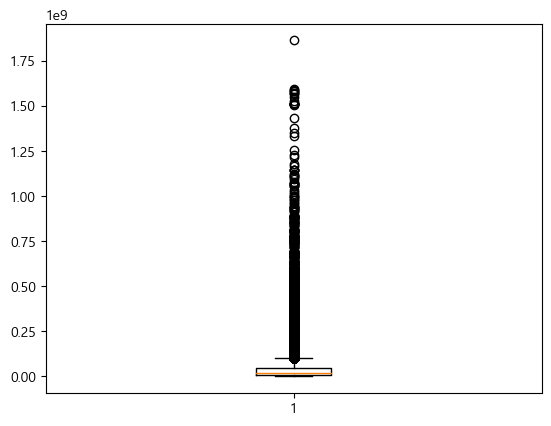

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')

import warnings
warnings.filterwarnings('ignore')

plt.boxplot(fin_filter['점포별_평균_매출_금액'])
plt.show()

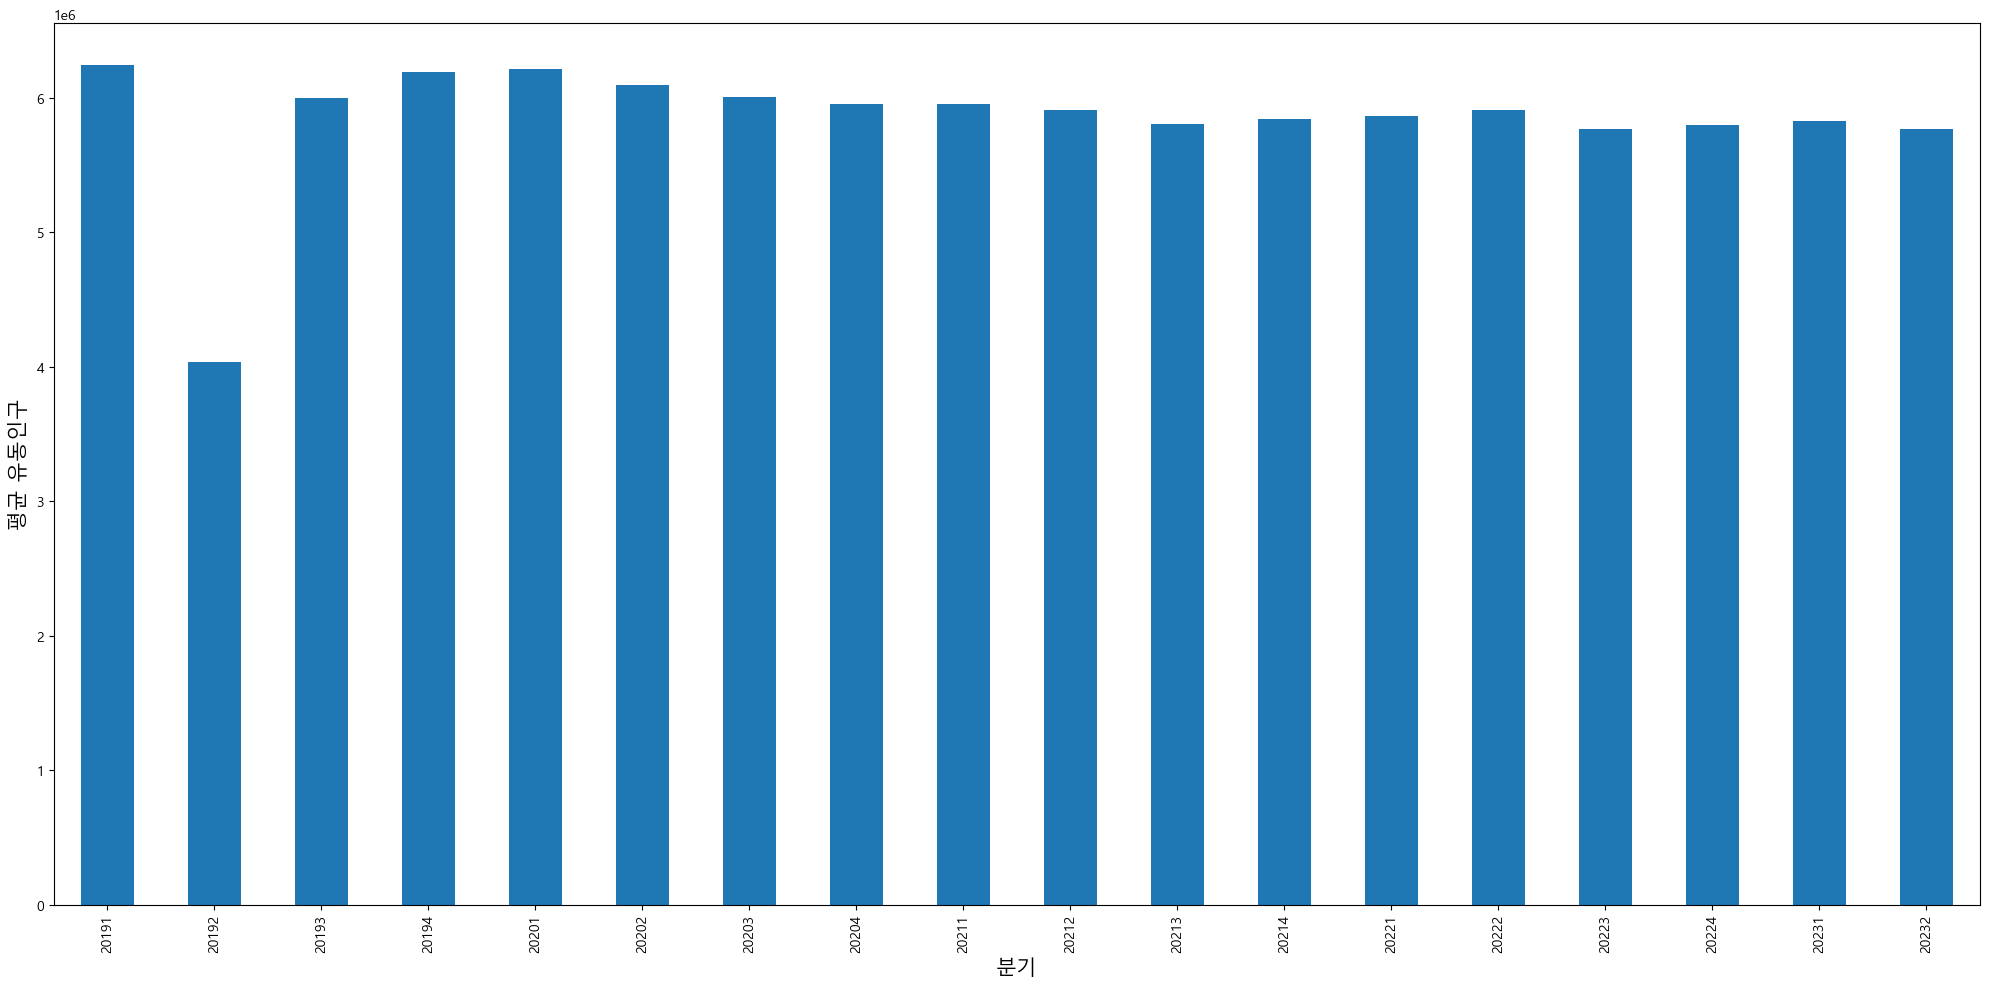

In [84]:
## 분기별 추이 확인(전체)
quarter_people = fin_filter.groupby(["기준_년분기_코드"])["총_유동인구_수"].mean()

# Matplotlib을 사용한 그룹별 바 플롯
plt.figure(figsize=(20,10))
quarter_people.plot(kind='bar', legend=False)

plt.xlabel("분기", fontsize=15)
plt.ylabel('평균 유동인구', fontsize=15)
#plt.title(var+' 총 매출-'+title , fontsize=20)

# 라벨이 겹치지 않도록 조정
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

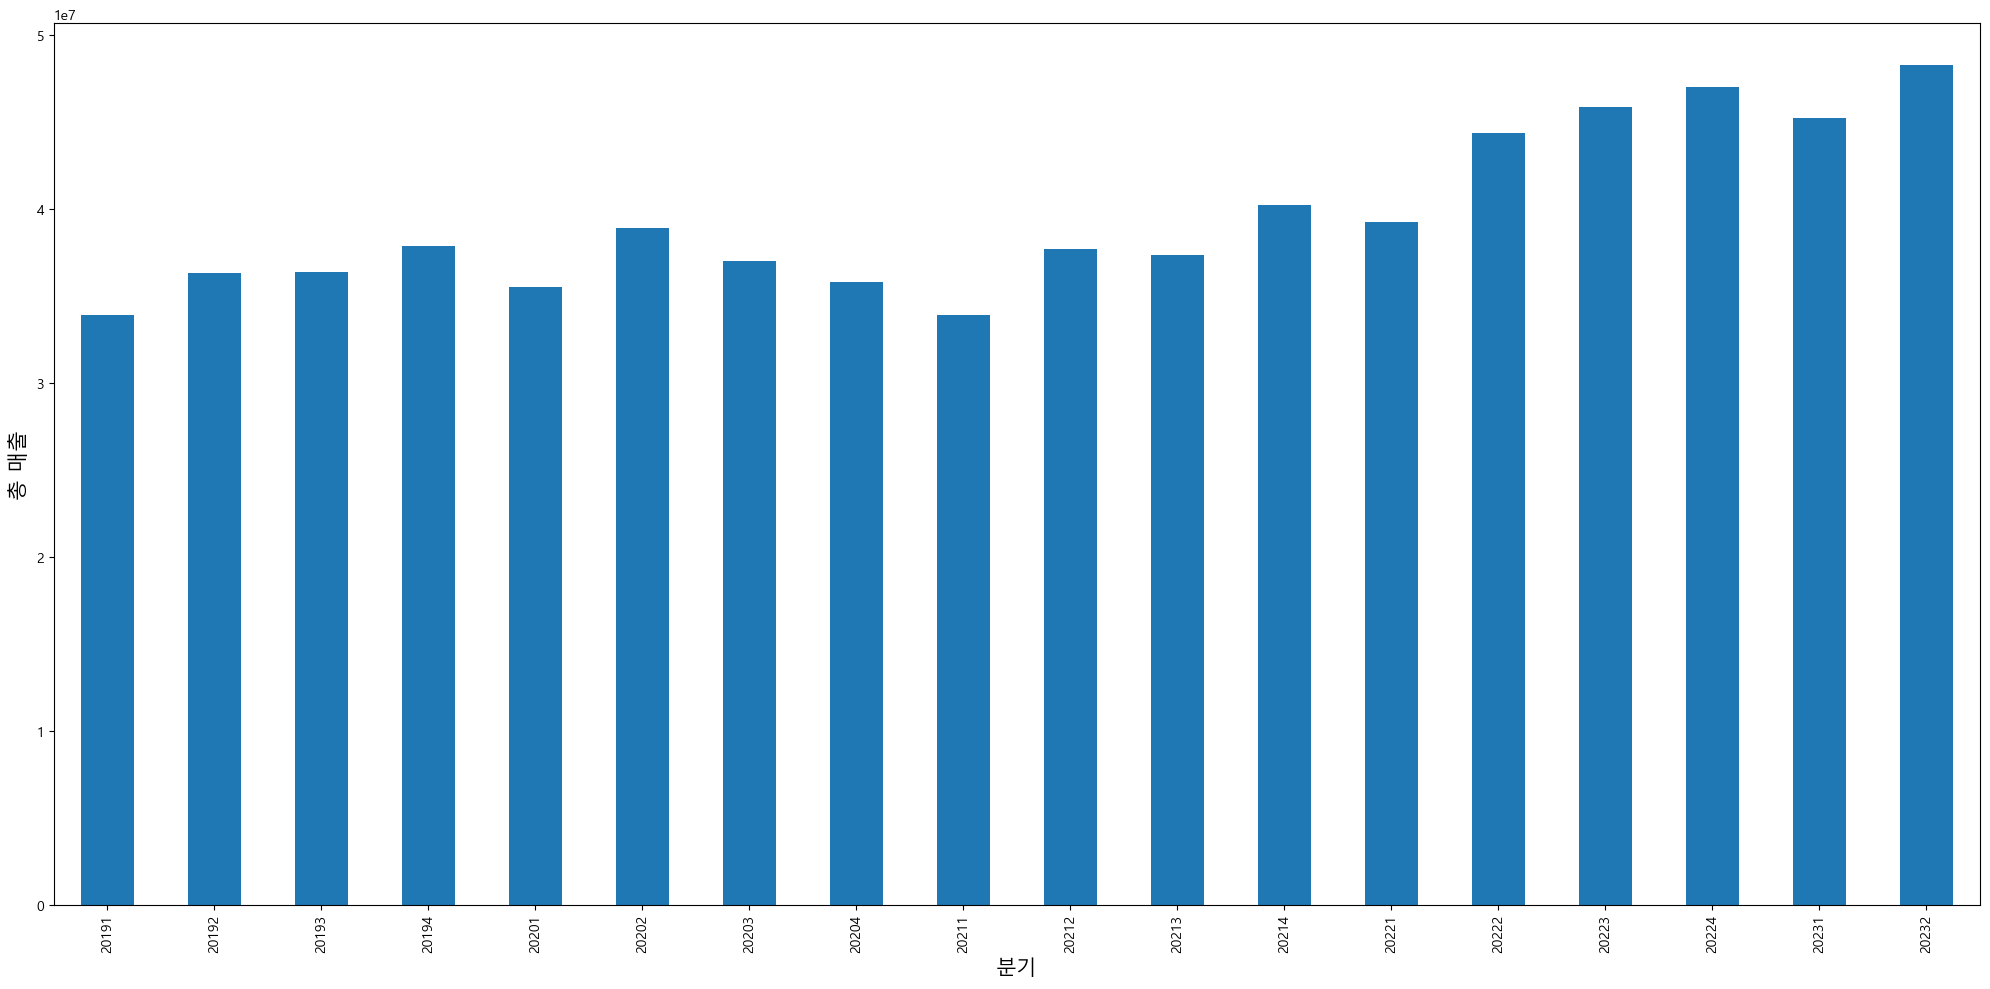

'_summary_\n1. 코로나(20.1-21.4)와 이후는 추세 차이 존재 -> 코로나 변수 생성\n2.  총 매출에서 반복되는 추세가 보임 → 분기(1,2,3,4) 생성\n'

In [85]:
## 분기별 추이 확인(전체)
quarter_sales = fin_filter.groupby(["기준_년분기_코드"])["점포별_평균_매출_금액"].mean()

# Matplotlib을 사용한 그룹별 바 플롯
plt.figure(figsize=(20,10))
quarter_sales.plot(kind='bar', legend=False)

plt.xlabel("분기", fontsize=15)
plt.ylabel('총 매출', fontsize=15)
#plt.title(var+' 총 매출-'+title , fontsize=20)

# 라벨이 겹치지 않도록 조정
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()
 
"""_summary_
1. 코로나(20.1-21.4)와 이후는 추세 차이 존재 -> 코로나 변수 생성
2.  총 매출에서 반복되는 추세가 보임 → 분기(1,2,3,4) 생성
"""

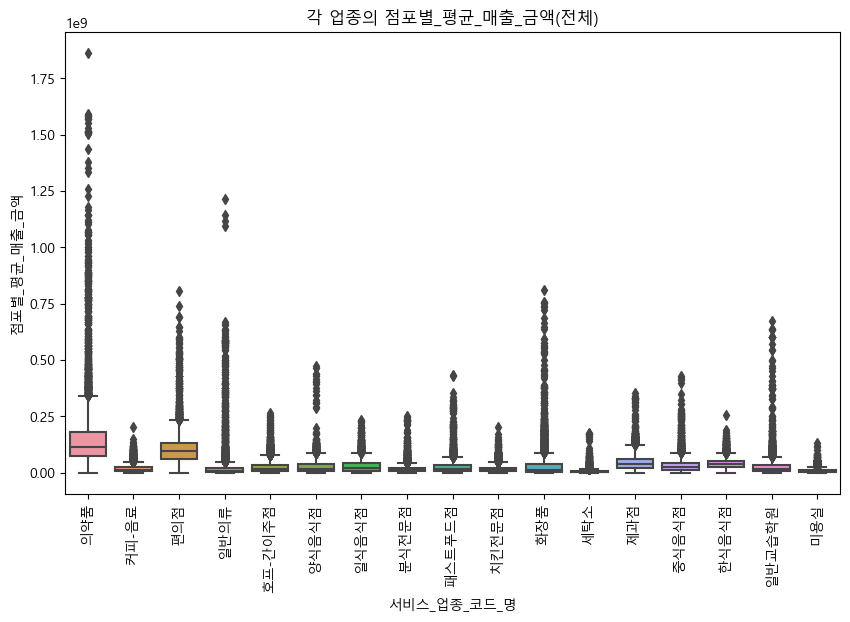

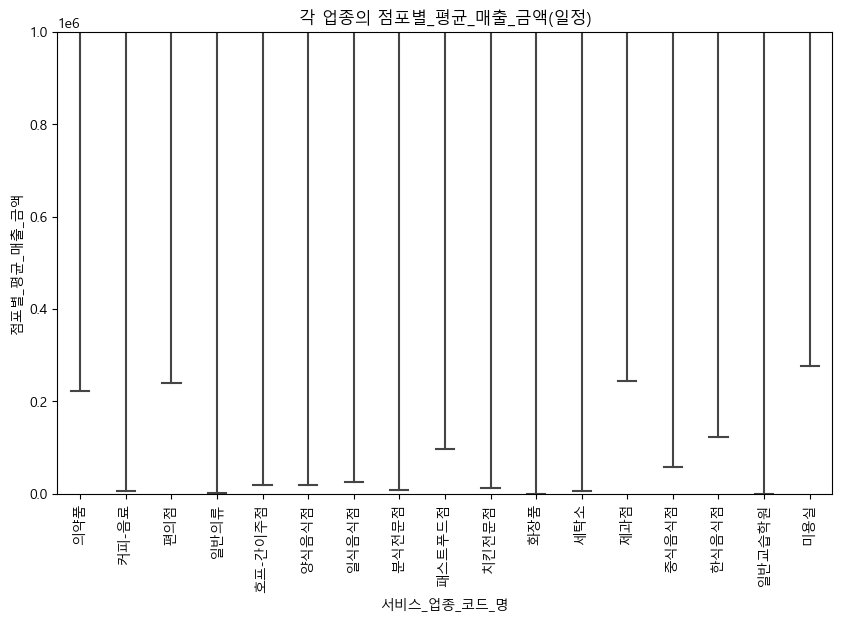

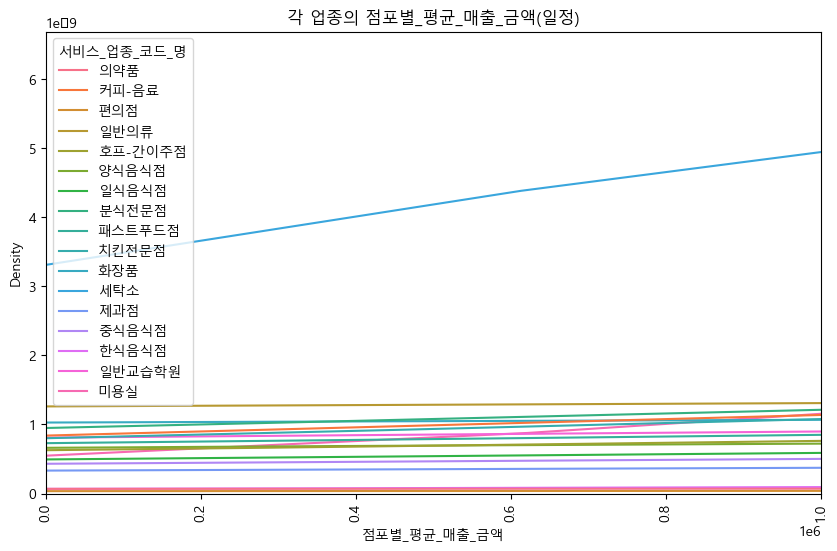

In [86]:
## 각 업종별 평균 매출 추이 파악 - 세탁소 에러 확인(제거), 100만원 이하 건수 삭제 시행
plt.figure(figsize=(10, 6))
plt.title('각 업종의 점포별_평균_매출_금액(전체)')
sns.boxplot(data=fin_filter, x='서비스_업종_코드_명', y='점포별_평균_매출_금액')
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(10, 6))
plt.title('각 업종의 점포별_평균_매출_금액(일정)')
sns.boxplot(data=fin_filter, x='서비스_업종_코드_명', y='점포별_평균_매출_금액')
plt.ylim(0, 1000000)
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(10, 6))
plt.title('각 업종의 점포별_평균_매출_금액(일정)')
sns.kdeplot(data=fin_filter, x='점포별_평균_매출_금액', hue="서비스_업종_코드_명")
plt.xlim(0, 1000000)
plt.xticks(rotation=90)
plt.show()

#### 세탁소 제거, 백만원 이하 제거

In [87]:
print('제거 전:',fin_filter.shape)
## [이슈4] 점포별_평균_매출_금액에 누락 값(이상치) 존재. 기준점을 세워 데이터 handling 진행
## [이슈5] 세탁소 제거 (현금 장사)
fin_filter_dropped = fin_filter[(fin_filter["점포별_평균_매출_금액"] > 1000000)&(fin_filter["서비스_업종_코드_명"]!="세탁소")]
print('제거 후:',fin_filter_dropped.shape)

제거 전: (114687, 176)
제거 후: (105807, 176)


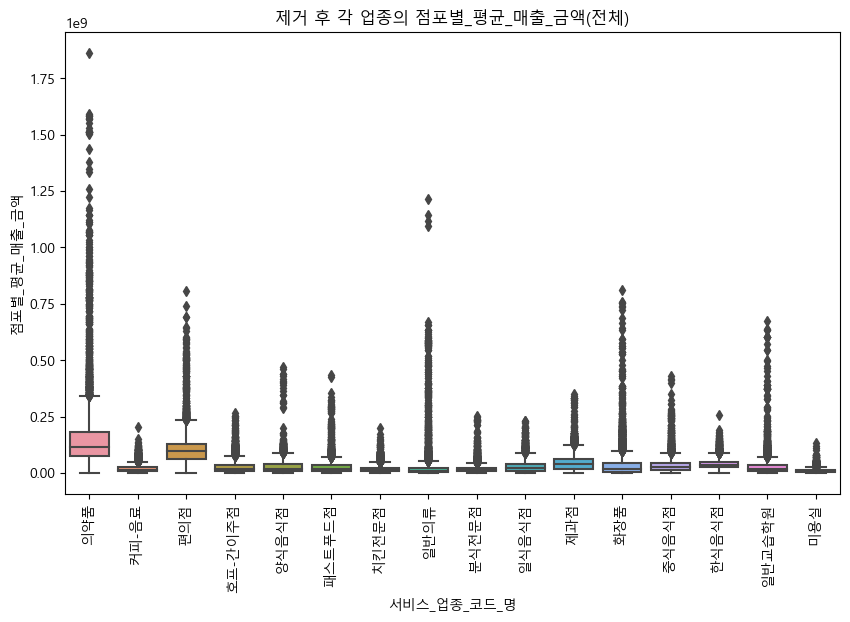

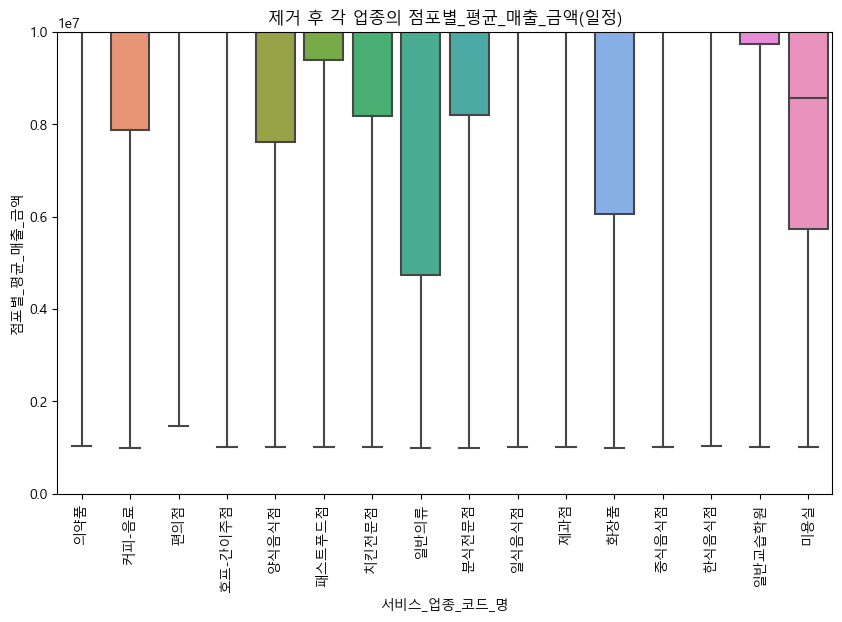

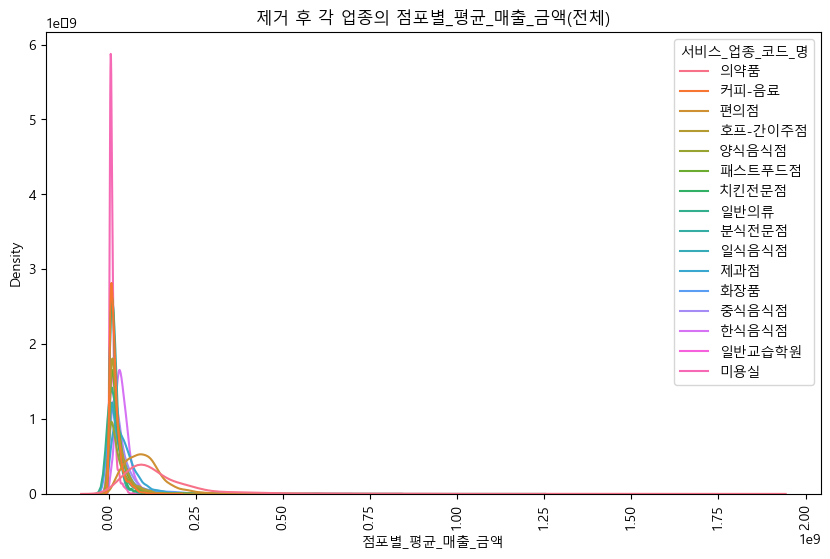

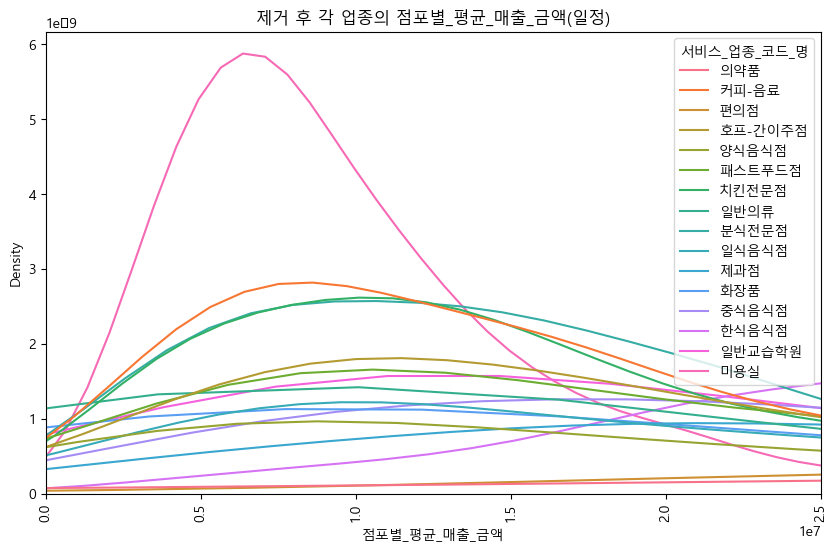

In [88]:
## 이상치 제거 후 각 업종별 평균 매출 추이 파악
plt.figure(figsize=(10, 6))
plt.title('제거 후 각 업종의 점포별_평균_매출_금액(전체)')
sns.boxplot(data=fin_filter_dropped, x='서비스_업종_코드_명', y='점포별_평균_매출_금액')
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(10, 6))
plt.title('제거 후 각 업종의 점포별_평균_매출_금액(일정)')
sns.boxplot(data=fin_filter_dropped, x='서비스_업종_코드_명', y='점포별_평균_매출_금액')
plt.ylim(0, 10000000)
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(10, 6))
plt.title('제거 후 각 업종의 점포별_평균_매출_금액(전체)')
sns.kdeplot(data=fin_filter_dropped, x='점포별_평균_매출_금액', hue="서비스_업종_코드_명")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
plt.title('제거 후 각 업종의 점포별_평균_매출_금액(일정)')
sns.kdeplot(data=fin_filter_dropped, x='점포별_평균_매출_금액', hue="서비스_업종_코드_명")
plt.xlim(0, 25000000)
plt.xticks(rotation=90)
plt.show()

### 분기, 코로나 컬럼 추가

In [89]:
## 분기, 코로나 COL 추가
# 코로나 = 20201-20214
fin_filter_dropped["분기"] = fin_filter_dropped["기준_년분기_코드"].apply(lambda x: int(str(x)[-1]))
fin_filter_dropped["코로나_여부"] = fin_filter_dropped["기준_년분기_코드"].apply(lambda x: 1 if x<20221 else 0)
print(fin_filter_dropped.shape)
fin_filter_dropped[["기준_년분기_코드", "분기", "코로나_여부"]].sort_values("기준_년분기_코드")

(105807, 178)


,기준_년분기_코드,분기,코로나_여부
2,20191,1,1
10802,20191,1,1
10799,20191,1,1
10797,20191,1,1
10796,20191,1,1
...,...,...,...
289647,20232,2,0
289646,20232,2,0
289645,20232,2,0
289669,20232,2,0


### csv 파일로 저장

In [90]:
fin_filter_dropped.to_csv(path2+'dong_service_data.csv', index=False)

## 모델 학습용 데이터

In [91]:
import pandas as pd

pd.set_option('display.max_columns', 500)

### 1. 해당 분기 매출 예측
- y: `점포별_평균_매출_금액`

In [92]:
estimate = pd.read_csv('../../data/preprocessed data/dong_service_data.csv')
estimate.shape

(105807, 178)

#### 불필요한 매출 관련 컬럼 제거

In [93]:
drop_cols = ['당월_매출_금액', '당월_매출_건수', '주중_매출_금액', '주말_매출_금액',
       '월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액',
       '토요일_매출_금액', '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액',
       '시간대_11~14_매출_금액', '시간대_14~17_매출_금액', '시간대_17~21_매출_금액',
       '시간대_21~24_매출_금액', '남성_매출_금액', '여성_매출_금액', '연령대_10_매출_금액',
       '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액', '연령대_50_매출_금액',
       '연령대_60_이상_매출_금액', '주중_매출_건수', '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수',
       '수요일_매출_건수', '목요일_매출_건수', '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수',
       '시간대_건수~06_매출_건수', '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수',
       '시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', '남성_매출_건수',
       '여성_매출_건수', '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수',
       '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수']

print(len(drop_cols))

estimate = estimate.drop(columns=drop_cols)
estimate.shape

48


(105807, 130)

#### 전년도_평균_매출_금액 컬럼 생성

In [94]:
before = estimate[['기준_년분기_코드', '행정동_코드', '서비스_업종_코드', '점포별_평균_매출_금액']]
before['기준_년분기_코드'] += 10
before = before.rename(columns={'점포별_평균_매출_금액': '전년도_점포별_평균_매출_금액'})

print(before['기준_년분기_코드'].unique())
display(before)

[20201 20202 20203 20204 20211 20212 20213 20214 20221 20222 20223 20224
 20231 20232 20233 20234 20241 20242]


,기준_년분기_코드,행정동_코드,서비스_업종_코드,전년도_점포별_평균_매출_금액
0,20201,11380510,CS300018,9.725545e+07
1,20201,11380570,CS100010,1.498190e+07
2,20201,11380530,CS300002,1.154142e+08
3,20201,11380631,CS100009,5.615918e+06
4,20201,11380631,CS300018,2.176335e+08
...,...,...,...,...
105802,20242,11740700,CS200001,1.218240e+07
105803,20242,11740700,CS200028,5.832440e+06
105804,20242,11740700,CS300002,9.019270e+07
105805,20242,11740700,CS300011,3.003883e+07


In [95]:
# '전년도_점포별_평균_매출_금액' 24712개 NaN
estimate = estimate.merge(before, how='left', on=['기준_년분기_코드', '행정동_코드', '서비스_업종_코드'])
estimate.isnull().sum()

기준_년분기_코드               0
행정동_코드                  0
행정동_코드_명                0
서비스_업종_코드               0
서비스_업종_코드_명             0
                    ...  
일요일_유동인구_수              0
점포별_평균_매출_금액            0
분기                      0
코로나_여부                  0
전년도_점포별_평균_매출_금액    24628
Length: 131, dtype: int64

In [96]:
estimate.columns

Index(['기준_년분기_코드', '행정동_코드', '행정동_코드_명', '서비스_업종_코드', '서비스_업종_코드_명', '집객시설_수',
       '관공서_수', '은행_수', '종합병원_수', '일반_병원_수',
       ...
       '화요일_유동인구_수', '수요일_유동인구_수', '목요일_유동인구_수', '금요일_유동인구_수', '토요일_유동인구_수',
       '일요일_유동인구_수', '점포별_평균_매출_금액', '분기', '코로나_여부', '전년도_점포별_평균_매출_금액'],
      dtype='object', length=131)

### 2. 다음 분기 매출 예측
- y: `점포별_예상_평균_매출_금액`

현재시점이 2023년 2분기일 때, 
- `점포별_예상_평균_매출_금액`(2023년 3분기) → 다음 분기 매출 금액
- `전년도_점포별_평균_매출_금액`(2022년 3분기) → 예측할 분기의 전년도 매출 금액 

In [97]:
predict = pd.read_csv('../../data/preprocessed data/dong_service_data.csv')
predict.shape

(105807, 178)

#### 불필요한 매출 관련 컬럼 제거

In [98]:
drop_cols = ['당월_매출_금액', '당월_매출_건수', '주중_매출_금액', '주말_매출_금액',
       '월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액',
       '토요일_매출_금액', '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액',
       '시간대_11~14_매출_금액', '시간대_14~17_매출_금액', '시간대_17~21_매출_금액',
       '시간대_21~24_매출_금액', '남성_매출_금액', '여성_매출_금액', '연령대_10_매출_금액',
       '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액', '연령대_50_매출_금액',
       '연령대_60_이상_매출_금액', '주중_매출_건수', '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수',
       '수요일_매출_건수', '목요일_매출_건수', '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수',
       '시간대_건수~06_매출_건수', '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수',
       '시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', '남성_매출_건수',
       '여성_매출_건수', '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수',
       '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수']

print(len(drop_cols))

predict = predict.drop(columns=drop_cols)
print(predict.shape)

48
(105807, 130)


#### 점포별_예상_평균_매출_금액 컬럼 생성

In [99]:
before = predict[['기준_년분기_코드', '행정동_코드', '서비스_업종_코드', '점포별_평균_매출_금액']]
before['기준_년분기_코드'] -= 1
before.loc[before['기준_년분기_코드'].isin([20190, 20200, 20210, 20220, 20230]), '기준_년분기_코드'] -= 6   # 0분기 → 전년도 4분기로 바꿔줌
before = before.rename(columns={'점포별_평균_매출_금액': '점포별_예상_평균_매출_금액'})

print(before['기준_년분기_코드'].unique())
display(before)

[20184 20191 20192 20193 20194 20201 20202 20203 20204 20211 20212 20213
 20214 20221 20222 20223 20224 20231]


,기준_년분기_코드,행정동_코드,서비스_업종_코드,점포별_예상_평균_매출_금액
0,20184,11380510,CS300018,9.725545e+07
1,20184,11380570,CS100010,1.498190e+07
2,20184,11380530,CS300002,1.154142e+08
3,20184,11380631,CS100009,5.615918e+06
4,20184,11380631,CS300018,2.176335e+08
...,...,...,...,...
105802,20231,11740700,CS200001,1.218240e+07
105803,20231,11740700,CS200028,5.832440e+06
105804,20231,11740700,CS300002,9.019270e+07
105805,20231,11740700,CS300011,3.003883e+07


In [100]:
# '점포별_예상_평균_매출_금액' 6638개 NaN
predict = predict.merge(before, how='left', on=['기준_년분기_코드', '행정동_코드', '서비스_업종_코드'])
predict.isnull().sum()

기준_년분기_코드             0
행정동_코드                0
행정동_코드_명              0
서비스_업종_코드             0
서비스_업종_코드_명           0
                   ... 
일요일_유동인구_수            0
점포별_평균_매출_금액          0
분기                    0
코로나_여부                0
점포별_예상_평균_매출_금액    6592
Length: 131, dtype: int64

#### 전년도_점포별_평균_매출_금액 컬럼 생성

In [101]:
before = estimate[['기준_년분기_코드', '행정동_코드', '서비스_업종_코드', '점포별_평균_매출_금액']]
before['기준_년분기_코드'] += 10
before['기준_년분기_코드'] -= 1
before.loc[before['기준_년분기_코드'].isin([20190, 20200, 20210, 20220, 20230]), '기준_년분기_코드'] -= 6   # 0분기 → 전년도 4분기로 바꿔줌
before = before.rename(columns={'점포별_평균_매출_금액': '전년도_점포별_평균_매출_금액'})

print(before['기준_년분기_코드'].unique())
display(before)

[20194 20201 20202 20203 20204 20211 20212 20213 20214 20221 20222 20223
 20224 20231 20232 20233 20240 20241]


,기준_년분기_코드,행정동_코드,서비스_업종_코드,전년도_점포별_평균_매출_금액
0,20194,11380510,CS300018,9.725545e+07
1,20194,11380570,CS100010,1.498190e+07
2,20194,11380530,CS300002,1.154142e+08
3,20194,11380631,CS100009,5.615918e+06
4,20194,11380631,CS300018,2.176335e+08
...,...,...,...,...
105802,20241,11740700,CS200001,1.218240e+07
105803,20241,11740700,CS200028,5.832440e+06
105804,20241,11740700,CS300002,9.019270e+07
105805,20241,11740700,CS300011,3.003883e+07


In [102]:
# '전년도_점포별_평균_매출_금액' 18732개 NaN
predict = predict.merge(before, how='left', on=['기준_년분기_코드', '행정동_코드', '서비스_업종_코드'])
predict.isnull().sum()

기준_년분기_코드               0
행정동_코드                  0
행정동_코드_명                0
서비스_업종_코드               0
서비스_업종_코드_명             0
                    ...  
점포별_평균_매출_금액            0
분기                      0
코로나_여부                  0
점포별_예상_평균_매출_금액      6592
전년도_점포별_평균_매출_금액    18668
Length: 132, dtype: int64

In [103]:
predict = predict.drop(columns=['점포별_평균_매출_금액'])
predict.columns

Index(['기준_년분기_코드', '행정동_코드', '행정동_코드_명', '서비스_업종_코드', '서비스_업종_코드_명', '집객시설_수',
       '관공서_수', '은행_수', '종합병원_수', '일반_병원_수',
       ...
       '화요일_유동인구_수', '수요일_유동인구_수', '목요일_유동인구_수', '금요일_유동인구_수', '토요일_유동인구_수',
       '일요일_유동인구_수', '분기', '코로나_여부', '점포별_예상_평균_매출_금액', '전년도_점포별_평균_매출_금액'],
      dtype='object', length=131)

### 데이터 컬럼 정리

In [104]:
## vif 변수 조합 후 최종 컬럼 결정
drop_col_dong_fin = ["집객시설_수", "유사_업종_점포_수", '지출_총금액', "총_유동인구_수", "총_가구_수", "여성_유동인구_수", "남성_유동인구_수",
              "월요일_유동인구_수", "화요일_유동인구_수", "수요일_유동인구_수", "목요일_유동인구_수", "금요일_유동인구_수",
              "토요일_유동인구_수", "일요일_유동인구_수", '총_상주인구_수', '남성_상주인구_수', '여성_상주인구_수',
              '남성연령대_10_상주인구_수', '남성연령대_20_상주인구_수', '남성연령대_30_상주인구_수', '남성연령대_40_상주인구_수', 
              '남성연령대_50_상주인구_수', '남성연령대_60_이상_상주인구_수', '여성연령대_10_상주인구_수', '여성연령대_20_상주인구_수', 
              '여성연령대_30_상주인구_수', '여성연령대_40_상주인구_수', '여성연령대_50_상주인구_수', '여성연령대_60_이상_상주인구_수',
              '총_직장_인구_수', '여성_직장_인구_수', '남성_직장_인구_수', '남성연령대_10_직장_인구_수', '남성연령대_20_직장_인구_수',
              '남성연령대_30_직장_인구_수', '남성연령대_40_직장_인구_수', '남성연령대_50_직장_인구_수', '남성연령대_60_이상_직장_인구_수', 
              '여성연령대_10_직장_인구_수', '여성연령대_20_직장_인구_수', '여성연령대_30_직장_인구_수', '여성연령대_40_직장_인구_수', 
              '여성연령대_50_직장_인구_수', '여성연령대_60_이상_직장_인구_수', "소득_구간_코드"]

estimate_dropped = estimate.drop(drop_col_dong_fin, axis=1)
predict_dropped = predict.drop(drop_col_dong_fin, axis=1)

# null 삭제 - 2019년
estimate_dropped.dropna(inplace=True)
predict_dropped.dropna(inplace=True)

#### csv 파일로 저장

In [105]:
estimate.to_csv('../../data/preprocessed data/dong_service_data_estimate.csv', index=False)
predict.to_csv('../../data/preprocessed data/dong_service_data_predict.csv', index=False)